# Car Price Regression Model (Final Project)

##### By: Nicolas Acha
##### September 2023
##### Final Project for "ANÁLISIS EMPRESARIAL DE DATOS EN PYTHON_EVCDP"

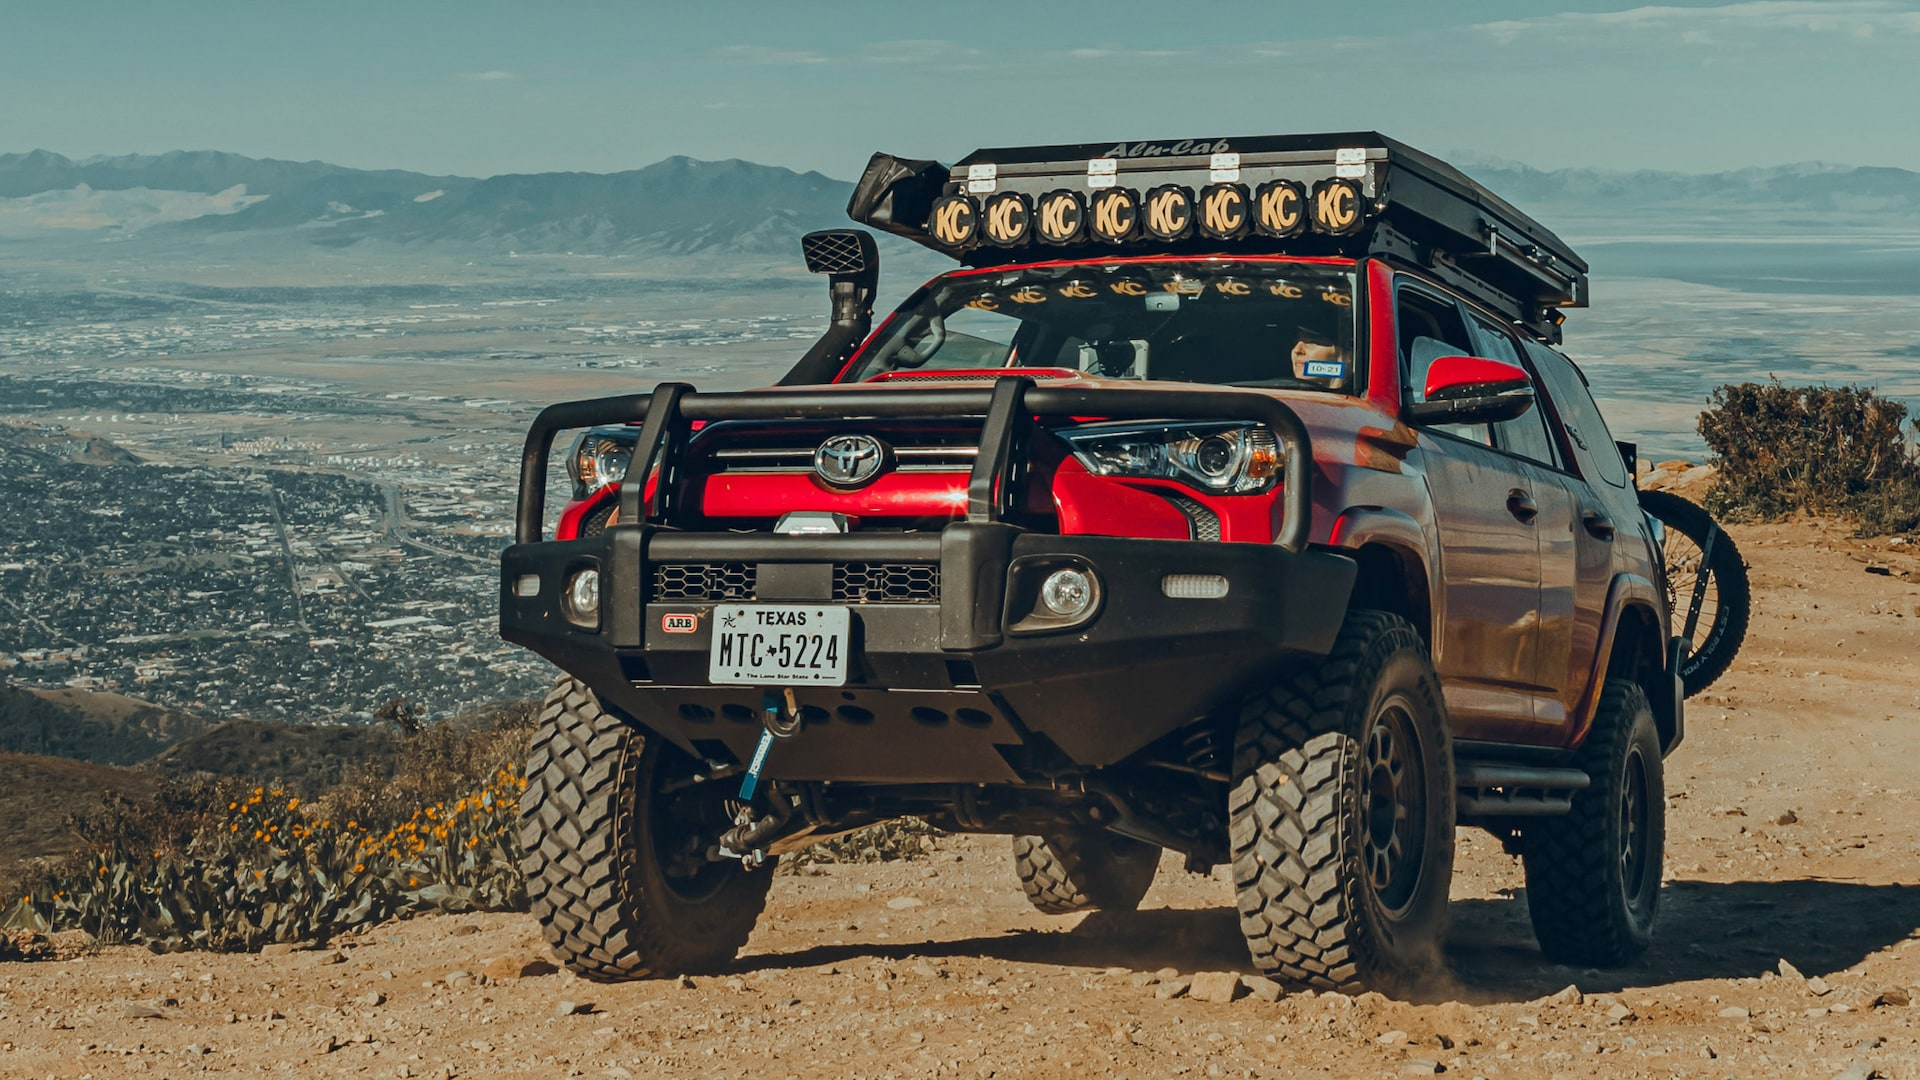
________________________________________________________________________________________________________________________________________________

### Summary: 

For this final project I want to analyze a dataset that contains cars models and brands data with their price and a set of independent features or characteristics about the vehicule. 

My main goal is to find an ecuation that could predict Y (Price) based on the most significant or influential features on car price. 
__________________________________________________________________________________________________________________________________________________

### Data Source: 

Link: https://www.kaggle.com/datasets/goyalshalini93/car-data?resource=download&select=Data+Dictionary+-+carprices.xlsx 
__________________________________________________________________________________________________________________________________________________

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Data Dictionary
car_data_dictionary = pd.read_csv(r'C:\Users\nicol\Documents\DATA_SCIENCE_UPB_TASKS\00 Data\01_datasets\Data_Dictionary.csv')
car_data_dictionary.drop(car_data_dictionary.columns[[3, 4]], axis=1, inplace=True)
car_data_dictionary.head(24)

1            Car_ID           Unique id of each observation (Interger)
0    2        Symboling   Its assigned insurance risk rating, A value of...
1    3        carCompany                  Name of car company (Categorical)
2    4          fueltype      Car fuel type i.e gas or diesel (Categorical)
3    5        aspiration             Aspiration used in a car (Categorical)
4    6        doornumber             Number of doors in a car (Categorical)
5    7           carbody                          body of car (Categorical)
6    8        drivewheel                  type of drive wheel (Categorical)
7    9    enginelocation               Location of car engine (Categorical)
8   10         wheelbase                          Weelbase of car (Numeric)
9   11         carlength                            Length of car (Numeric)
10  12          carwidth                             Width of car (Numeric)
11  13         carheight                            height of car (Numeric)
12  14        curbweight  The weight of a car without occupants or bagga...
13  15        enginetype                      Type of engine. (Categorical)
14  16    cylindernumber           cylinder placed in the car (Categorical)
15  17        enginesize                              Size of car (Numeric)
16  18        fuelsystem                   Fuel system of car (Categorical)
17  19         boreratio                         Boreratio of car (Numeric)
18  20            stroke       Stroke or volume inside the engine (Numeric)
19  21  compressionratio                 compression ratio of car (Numeric)
20  22        horsepower                               Horsepower (Numeric)
21  23           peakrpm                             car peak rpm (Numeric)
22  24           citympg                          Mileage in city (Numeric)
23  25        highwaympg                       Mileage on highway (Numeric)

In [3]:
##Data Set
df = pd.read_csv(r'C:\Users\nicol\Documents\DATA_SCIENCE_UPB_TASKS\00 Data\01_datasets\CarPrice_Assignment.csv')
df.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
## About the dataset
print(f'DATA FRAME SIZE: --->{df.shape}')

DATA FRAME SIZE: --->(205, 26)


In [5]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
df.info()
print('ON THIS DATABASE I FOUND 0 NULL VALUES - GREAT!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:

CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0] if len(x.split(' ')) >= 1 else '')
CarModel = df['CarName'].apply(lambda x : x.split(' ')[1] if len(x.split(' ')) >= 2 else '')
print("Missing CompanyName:", CompanyName.isnull().sum())
print("Missing CarModel:", CarModel.isnull().sum())
df.insert(3, "CompanyName", CompanyName)
df.insert(4, "CarModel", CarModel)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

Missing CompanyName: 0
Missing CarModel: 0


car_ID  symboling  CompanyName      CarModel fueltype aspiration  \
0       1          3  alfa-romero        giulia      gas        std   
1       2          3  alfa-romero       stelvio      gas        std   
2       3          1  alfa-romero  Quadrifoglio      gas        std   
3       4          2         audi           100      gas        std   
4       5          2         audi         100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  ...  enginesize  \
0        two  convertible        rwd          front  ...         130   
1        two  convertible        rwd          front  ...         130   
2        two    hatchback        rwd          front  ...         152   
3       four        sedan        fwd          front  ...         109   
4       four        sedan        4wd          front  ...         136   

   fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0        111    5000   
1        mpfi       3.47    2.68               9.0        111    5000   
2        mpfi       2.68    3.47               9.0        154    5000   
3        mpfi       3.19    3.40              10.0        102    5500   
4        mpfi       3.19    3.40               8.0        115    5500   

   citympg highwaympg    price  
0       21         27  13495.0  
1       21         27  16500.0  
2       19         26  16500.0  
3       24         30  13950.0  
4       18         22  17450.0  

[5 rows x 27 columns]

In [9]:
## The are some equaly Company Names written in a slightly diferent style: 
df.CompanyName.unique()
print(f'{df.CompanyName.unique()} ')
print('-'*20)
print('maxda = mazda, vokswagen = volkswagen = vw, toyota = toyouta, Nissan = nissan ...')

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo'] 
--------------------
maxda = mazda, vokswagen = volkswagen = vw, toyota = toyouta, Nissan = nissan ...


In [10]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
##Data Analysis
correlacion=df.corr()
correlacion

C:\Users\nicol\AppData\Local\Temp\ipykernel_22304\3238716078.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr()


car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

In [12]:
#To much data, lets try to make it visual!
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\nicol\AppData\Local\Temp\ipykernel_22304\2827629307.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


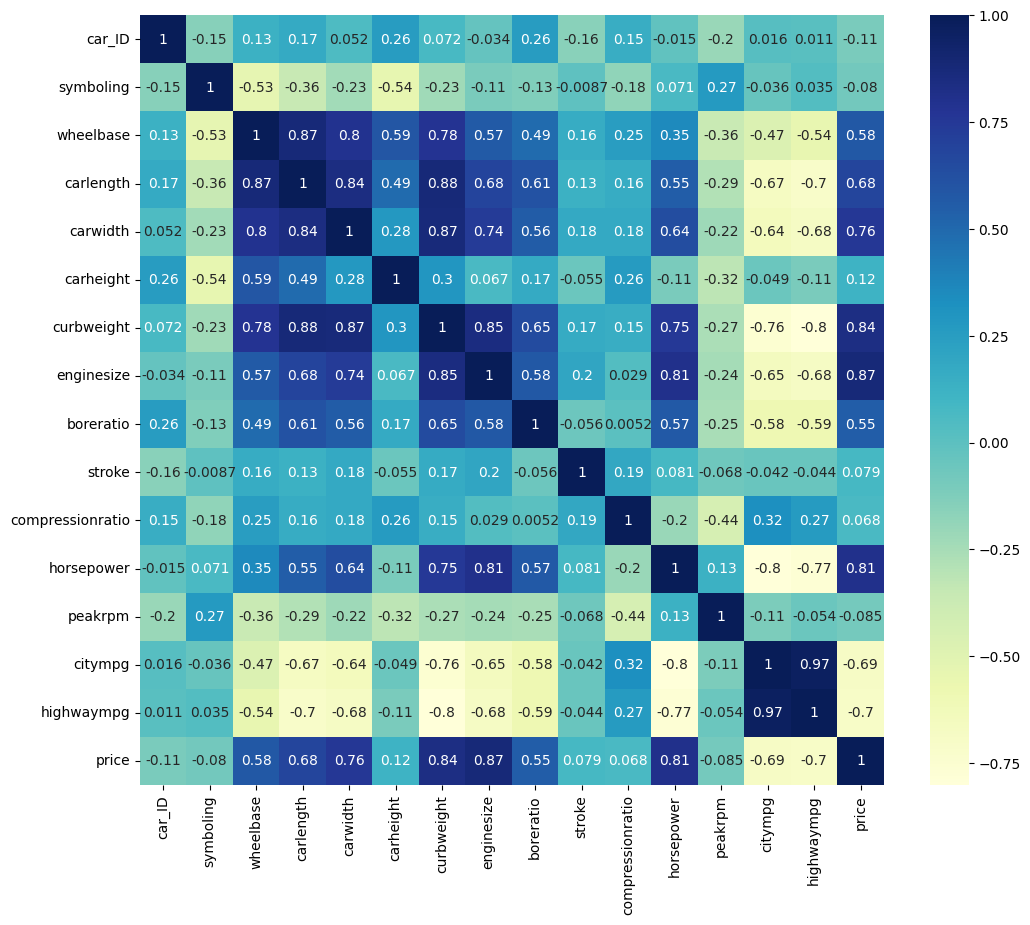

In [13]:
# Let's see the correlation between different variables.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_22304\3357956484.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


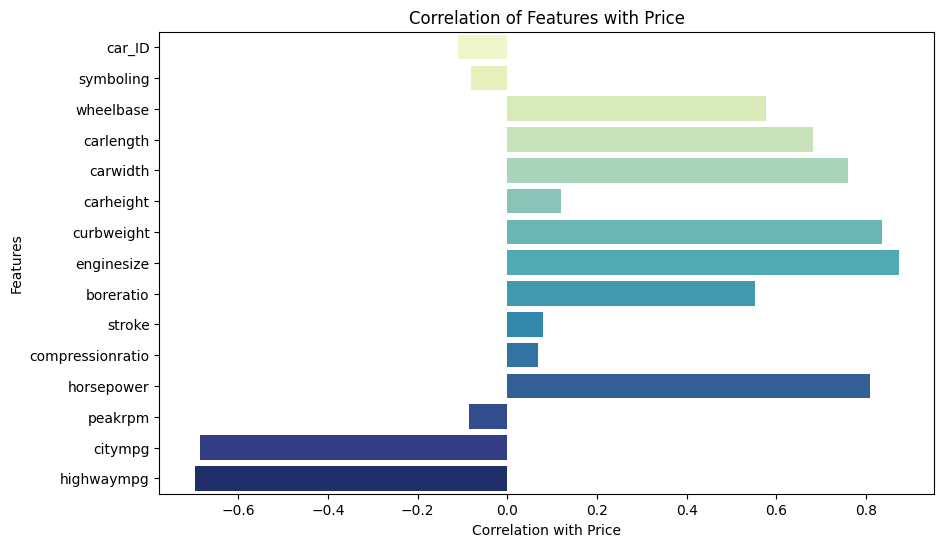

In [14]:
## CHAT GPT ASSITED: I wanted to focus only on the price feature as depended value: 
# Calculate the correlation between 'price' and all other numeric features
correlation_matrix = df.corr()
price_correlation = correlation_matrix['price'].drop('price')  # Drop 'price' itself from the list

# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.values, y=price_correlation.index, palette="YlGnBu")

# Add labels and title
plt.xlabel("Correlation with Price")
plt.ylabel("Features")
plt.title("Correlation of Features with Price")

# Show the plot
plt.show()

### Positive Correlated Features With Price: 

The most significant ones are : 

1) Wheel base - the distance between the centres of the front and rear wheels
2) CarLength - Length of car
3) CarWidth - Width of car
4) Curbweight -  Its widest point without its mirrors
5) Enginesize - The volume of fuel and air that can be pushed through a car's cylinders
6) Boreratio - The bore-stroke ratio and the cylinder volume affect the exhaust emissions and the fuel consumption of an engine.
7) Horsepower - Is a measurement used to calculate how quickly the force is produced from a vehicle's engine

Based on my intuitions and roleplaying a car business expert I would say that features [1,2,3,4] does make sense to be highly correlated with a car price because it measures the volumen and size of a car. The bigger the vehicule the more expensive it is. 

Also features [5,6,7] also make sense to be highly important and positive correlated because it measures the engine size and power of a vehicule wich it increases it's price as well. 

I want to try to use them all in my model

----------------------------------------------------------------------------------------------------------------------------------------------------------

### Negative Correlated Features With Price: 

The most significant ones are: 
1. CityMpg
2. HighMpg

It may make sense on a mathematical viewpoint because the more efficient and less consuming cars is related to small cars and less engine size wich also means more affordable prices. Although from a business perspective I believe that those features can help managers to make cars valuables and should not be part of a this model. 

I will try a regretion without them

In [15]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'CarModel', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [16]:
## Regression Model 
## 1. Delete non usefull features
df_regression = df.drop(['car_ID', 'symboling', 'CompanyName', 'CarModel', 'fueltype','aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'], axis=1)

In [17]:
import statsmodels.api as sm

In [18]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginetype        205 non-null    object 
 6   cylindernumber    205 non-null    object 
 7   enginesize        205 non-null    int64  
 8   fuelsystem        205 non-null    object 
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [19]:
#Define the Y
y = df_regression['price']
X = df_regression[['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize','boreratio','horsepower']]

#Add Constant
X = sm.add_constant(X)

#Ajust
model_1 = sm.OLS(y, X).fit()

#Observe
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           2.99e-70
Time:                        14:21:18   Log-Likelihood:                -1955.7
No. Observations:                 205   AIC:                             3927.
Df Residuals:                     197   BIC:                             3954.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.243e+04   1.32e+04     -3.216      0.0

In [20]:
##Model 2 without carlength and boreratio

#Define the Y
y = df_regression['price']
X = df_regression[['wheelbase', 'carwidth','curbweight', 'enginesize','horsepower']]

#Add Constant
X = sm.add_constant(X)

#Ajust
model_2 = sm.OLS(y, X).fit()

#Observe
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           4.50e-72
Time:                        14:21:18   Log-Likelihood:                -1956.7
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     199   BIC:                             3945.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.613e+04   1.28e+04     -3.595      0.0

## Results: 
-----------------------------------------------------------------------------------------------------------------------------
### The values we are concerned with are 
 
#### R-squared is 0.820 meaning that 82% of the variance is explained by these features and its a decent R-Squared 
#### F statistic and its significance - has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

___________________________________________
## Model 3: 


In [21]:
from sklearn.model_selection import train_test_split

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Add a constant
X_train = sm.add_constant(X_train)

#Model 3
modelo_3 = sm.OLS(y_train, X_train).fit()

#Results
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           8.89e-57
Time:                        14:25:25   Log-Likelihood:                -1560.6
No. Observations:                 164   AIC:                             3133.
Df Residuals:                     158   BIC:                             3152.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.856e+04   1.32e+04     -3.672      0.0

In [23]:
#Add a constant to test data
X_test = sm.add_constant(X_test)

#Predict the test data
y_pred = modelo_3.predict(X_test)

from sklearn.metrics import r2_score

#We test it
r2_score(y_test, y_pred)

0.8202764995975594

We were able to predict with 82% accuracy on this model 3 